<a href="https://colab.research.google.com/github/rajivsresearch/General/blob/master/Bankruptcy_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
total19 = pd.read_excel('/content/drive/My Drive/Data/Bankruptcies/2019.xlsx', sheet_name='Total')
total20 = pd.read_excel('/content/drive/My Drive/Data/Bankruptcies/2020.xlsx', sheet_name='Total')

In [27]:
total19.head()

,type,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,province
0,Newfoundland and Labrador/Terre-Neuve et Labrador,212,271,289,343,295,281,280,268,255,264,276,228,Newfoundland and Labrador
1,Bankruptcies/Faillites,84,124,118,167,130,141,139,113,125,131,134,95,
2,Proposals/Propositions,128,147,171,176,165,140,141,155,130,133,142,133,
3,Prince Edward Island/Île-du-Prince-Édouard,57,54,60,69,76,62,64,66,44,77,71,59,Prince Edward Island
4,Bankruptcies/Faillites,35,27,30,40,37,28,39,31,22,34,38,34,


In [0]:
total19.columns = ['type', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
total20.columns = ['type', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

In [0]:
def get_province(x):
  if x.find('Bankruptcies') >= 0:
    return ''
  elif x.find('Proposals') >= 0:
    return ''
  else:
    return x.split('/')[0]

In [24]:
get_province('Newfoundland and Labrador/Terre-Neuve et Labrador')

'Newfoundland and Labrador'

In [0]:
total19['province'] = total19['type'].apply(lambda x: get_province(x))
total20['province'] = total20['type'].apply(lambda x: get_province(x))

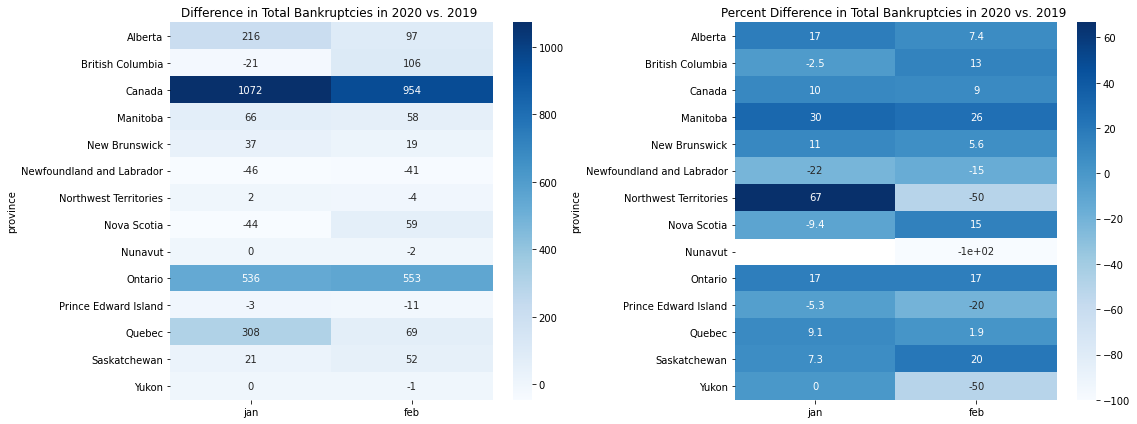

In [66]:
f1 = total19['province'] != ''
g19 = total19.loc[f1,['province', 'jan', 'feb']].groupby('province').sum()
g20 = total20.loc[f1,['province', 'jan', 'feb']].groupby('province').sum()

fig,ax = plt.subplots(1,2,figsize=(16,6))
plt.subplot(121)
sns.heatmap((g20 - g19), cmap='Blues', annot=True, fmt='g')
plt.title('Difference in Total Bankruptcies in 2020 vs. 2019 ')

plt.subplot(122)
sns.heatmap(((g20 - g19)/g19*100), cmap='Blues', annot=True, fmt='.2g')
plt.title('Percent Difference in Total Bankruptcies in 2020 vs. 2019 ')

plt.tight_layout()